**1. Importing Libraries**

---

In [26]:
import torch
import torch.nn as nn
import pandas as pd
import seaborn as sns
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

**2. Settings**

---



In [27]:

batch_size = 64
learning_rate = 0.001
epochs = 10

**3. Image Preprocessing**

---



In [28]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

**4. Downloading MNIST Dataset**

---



In [29]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15685011.59it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 489128.85it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1144725.35it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4224064.03it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



**5. Creating DataLoader**

---



In [30]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

**6. Building the Model**

---



In [31]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Creating Model and Moving to GPU if Available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleNN().to(device)

**7. Choosing Loss Function and Optimizer**

---



In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

**8. Training the Model**

---



In [33]:
for epoch in range(epochs):
    for data, labels in train_loader:
        data, labels = data.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 1.5154
Epoch [2/10], Loss: 1.6235
Epoch [3/10], Loss: 1.5421
Epoch [4/10], Loss: 1.4658
Epoch [5/10], Loss: 1.4627
Epoch [6/10], Loss: 1.4979
Epoch [7/10], Loss: 1.5563
Epoch [8/10], Loss: 1.4783
Epoch [9/10], Loss: 1.4988
Epoch [10/10], Loss: 1.5528


**9. Evaluating the Model**

---



In [34]:
model.eval()
correct = 0
total = 0
predictions = []

with torch.no_grad():
    for data, labels in test_loader:
        data, labels = data.to(device), labels.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predictions.extend(predicted.cpu().numpy())

**10. Confusion Matrix**

---



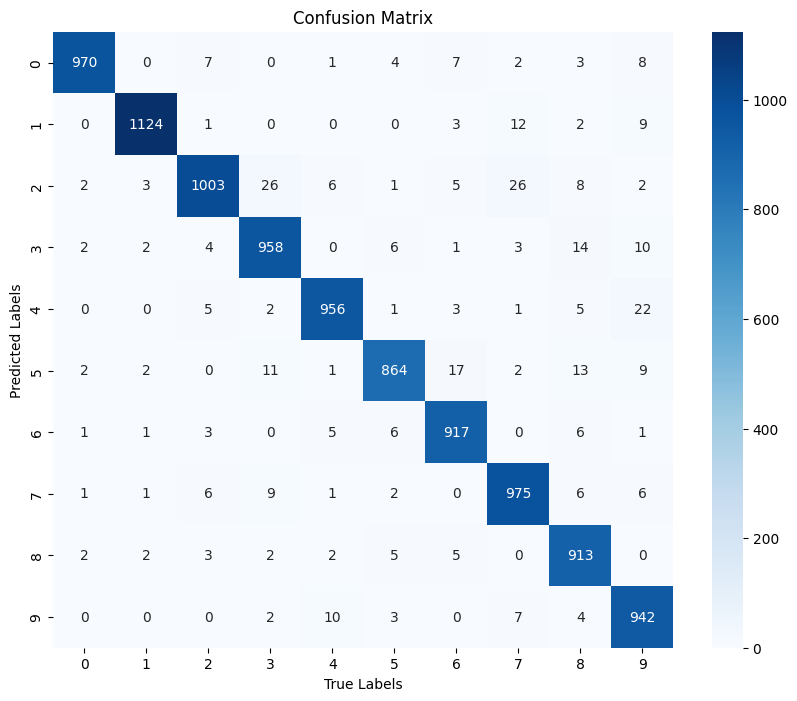

In [36]:
confusion_matrix = torch.zeros(10, 10, dtype=torch.int32)
for i, j in zip(predictions, test_dataset.targets):
    confusion_matrix[i, j] += 1

# Plotting Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix.numpy(), annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()

**11. Accuracy**

---



In [37]:
print("Accuracy on test set: {:.2%}".format(correct / total))

Accuracy on test set: 96.22%
